# DSCI 503 - Homework 04
### Matt Snyder

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [5]:
# Create an array x containing the following integers: 10, 16, 26, 12, 17, 22, 14, 12, 21, 16
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])

# Store the length of this array in a variable n.
n = len(x)

# Calculate the sample mean, storing the result in mean. You may use np.sum() in your calculation.
mean = np.sum(x)/n

# Calculate an array named diff that stores the differences between each value in x and the mean. That is to
# that that diff should contain values (𝑥𝑖− 𝑥̅) for each𝑖 = 1, . . . , 𝑛.
diff = x - mean

# Use diff, n, and np.sum() to find the sample variance. Store the result in a variable named var.
var = np.sum(diff**2) / (n-1)

# Print your results in the format shown below. Make sure that the numerical outputs are aligned with each other
print (f'Sample Mean:     {mean:<6}')
print (f'Sample Variance: {var:<6}')

Sample Mean:     16.6  
Sample Variance: 25.6  


In [7]:
# Use the functions np.mean() and np.var() to calculate the sample mean and sample variance of x, storing the result in
# variables named mean_np and var_np. In order to get the sample variance (as opposed to the population variance) you
# will need to set the ddof parameter of np.var() to 1.
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)

# Print the results in the same format as above
print (f'Sample Mean:     {mean:<6}')
print (f'Sample Variance: {var:<6}')

Sample Mean:     16.6  
Sample Variance: 25.6  


## Problem 2: Scoring a Regression Model

In [8]:
def find_sse(true_y, pred_y):
    """ The parameter true_y is expected to be an array of observed 𝑦 values 
        while pred_y is expected to be an array of predicted 𝑦 values generated by a regression model. 
        Returns the SSE score for the regression model
    """
    result = np.sum((true_y - pred_y)**2)
    return result

In [13]:
# define numpy arrays true_y, pred_1, and pred_2
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

# Use find_sse() to calculate the SSE score for each model, storing the results in variables named sse_1 and sse_2.
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

#Print your results in the format shown below. Round your numerical outputs to 2 decimal places.
print (f'Model 1 SSE: {sse_1:<6.2f}')
print (f'Model 1 SSE: {sse_2:<6.2f}')

Model 1 SSE: 22.66 
Model 1 SSE: 19.90 


## Problem 3: Scoring a Classification Model

In [16]:
def find_accuracy(true_y, pred_y):
    """ The parameter true_y is expected to be an array of observed classes 
        pred_y is expected to be an array of predicted classes generated by a classification model. 
        The function returns the accuracy score for the classification model, as calculated on this set of observations. 
    """
    result = np.sum(true_y == pred_y) / len(true_y)
    return result

In [17]:
# Create arrays named true_diag and pred_diag to store the diagnosis information provided above. 
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])

# Use find_accuracy() to calculate the accuracy of the classification model that generated these these predictions. 
accuracy = find_accuracy(true_diag, pred_diag)

# print the result in the following format:
print (f'Model Accuracy: {accuracy}')

Model Accuracy: 0.75


In [19]:
# Create arrays named true_labels and pred_labels to store the label information provided above. 
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

# Use find_accuracy() to calculate the accuracy of the classification model that generated these these predictions. 
accuracy = find_accuracy(true_labels, pred_labels)

# print the result in the following format:
print (f'Model Accuracy: {accuracy}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [33]:
def classification_report(true_y, pred_y):
    """ This function will print several metrics used to evaluation the performance of a classification model 
        based on the supplied values of true_y and pred_y. 
    """
    # Create a local variable called classes that stores the unique values that appear in true_y. 
    # value in classes[0] is the "negative class" and the value in classes[1] is the "positive class".
    classes = np.unique(true_y)
    
    # Use find_accuracy() to calculate and store the model's accuracy.
    accuracy = find_accuracy(true_y, pred_y)
    
    # Use NumPy (and no loops) to calculate TP, FP, TN, and FN.
    # TP if it was predicted to be in the positive class, and actually was in the positive class.
    TP = np.sum((pred_y == classes[0]) & (true_y == classes[0]))
    # FP if it was predicted to be in the positive class, but actually was in the negative class.
    FP = np.sum((pred_y == classes[0]) & (true_y == classes[1]))
    # TN if it was predicted to be in the negative class, and actually was in the negative class.
    TN = np.sum((pred_y == classes[1]) & (true_y == classes[1]))
    # FN if it was predicted to be in the negative class, but actually was in the positive class.
    FN = np.sum((pred_y == classes[1]) & (true_y == classes[0]))

    #Calculate the positive precision, positive recall, negative precision, and negative recall.

    positive_precision = TP / (TP + FP)
    positive_recall = TP / (TP + FN)
    negative_precision = TN / (TN + FN)
    negative_recall = TN / (TN + FP)

    # Print several lines displaying the results of these calculations, as shown below. 
    print ('Positive Class:     ' + classes[0])
    print ('Negative Class:     ' + classes[1])
    print()
    print (f'Accuracy:           {accuracy:<6.4f}')
    print (f'Positive Precision: {positive_precision:<6.4f}')
    print (f'Positive Recall:    {positive_recall:<6.4f}')
    print (f'Negative Precision: {negative_precision:<6.4f}')
    print (f'Negative Recall:    {negative_recall:<6.4f}')



In [34]:
# Use the classification_report() function to display a report for the medical diagnosis model from Problem 3.
classification_report(true_diag, pred_diag)

Positive Class:     N
Negative Class:     P

Accuracy:           0.7500
Positive Precision: 0.9091
Positive Recall:    0.7143
Negative Precision: 0.5556
Negative Recall:    0.8333


In [35]:
# Use the classification_report() function to display a report for the image classification model from Problem 3.
classification_report(true_labels, pred_labels)

Positive Class:     cat
Negative Class:     dog

Accuracy:           0.8750
Positive Precision: 0.9167
Positive Recall:    0.8462
Negative Precision: 0.8333
Negative Recall:    0.9091


## Problem 5: Transformation of Random Variables

In [37]:
# Use numpy to set a seed of 1. 
np.random.seed(1)
# Use np.random.normal to sample 25,000 observations from a normal distribution with a mean of 0 and 
# a standard deviation of 0.4. Name the resulting array X 
X = np.random.normal(loc=0, scale=0.4, size=25000)

# Assume that 𝑌 = 𝑒𝑋. Use a numpy function to create an array Y based on the sampled values in X.
Y = np.exp(X)

# Use np.mean() and np.std() (with ddof=1) to calculate the sample mean and sample standard deviation of both X and
# Y. Print the results in the format shown below, with the numerical outputs left-aligned and rounded to four decimal places.
mean_X = np.mean(X)
std_dev_X = np.std(X)
mean_Y = np.mean(Y)
std_dev_Y = np.std(Y)

print(f'Sample Mean of X:    {mean_X:<6.4f}')
print(f'Sample Std Dev of X: {std_dev_X:<6.4f}')
print(f'Sample Mean of Y:    {mean_Y:<6.4f}')
print(f'Sample Std Dev of Y: {std_dev_Y:<6.4f}')

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537


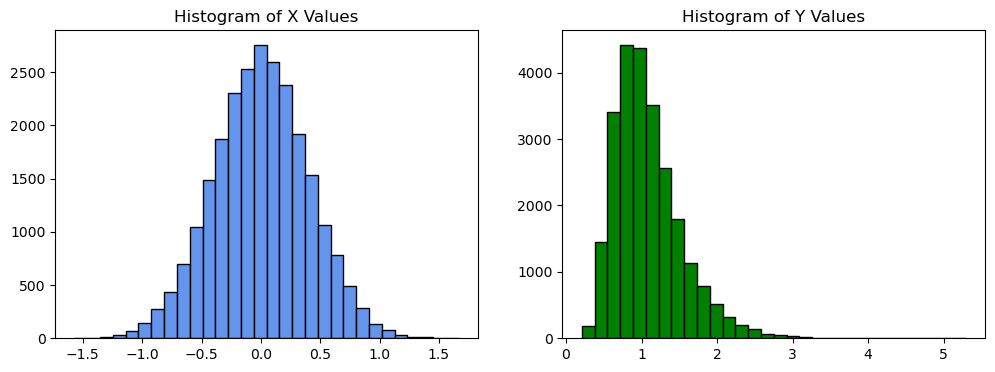

In [43]:
# Create a single figure with two side-by-side subplots, each of which contains a histogram. 
# The figure size should be set to [12, 4].
plt.figure(figsize=[12,4])

# Both histograms should have 30 bins and an edgecolor set to black.
# Select different named colors for the bars in the two histograms.
# The titles of the histograms should be set to "Histogram of X Values" and "Histogram of Y Values", as

# The left subplot should contain a histogram of values in X 
plt.subplot(1,2,1)
plt.hist(X, edgecolor='black', color='cornflowerblue', bins=30)
plt.title('Histogram of X Values')

# The right subplot should contain a histogram of values in Y. 
plt.subplot(1,2,2)
plt.hist(Y, edgecolor='black', color='green', bins=30)
plt.title('Histogram of Y Values')

# Make sure to call plt.show() to display your figure.
plt.show()

In [44]:
# Use np.mean() and array comparisons to calculate the proportion of values in Y that are less than 0.5, less than 1, and less than 2.
Y_less_than_point_5 = np.mean(Y < 0.5) # same as summing them and dividing by total
Y_less_than_1 = np.mean(Y < 1)
Y_less_than_point_2 = np.mean(Y < 2)

# Print your results in the format shown below, with the numerical outputs left-aligned and rounded to 4 decimal places.
print (f'Probability that Y is less than 0.5: {Y_less_than_point_5:<6.4f}')
print (f'Probability that Y is less than 1.0: {Y_less_than_1:<6.4f}')
print (f'Probability that Y is less than 2.0: {Y_less_than_point_2:<6.4f}')

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574
